In [3]:
library(tidyverse)

#install.packages('hablar')
#library(hablar)

#install.packages("tidyr")
#install.packages("rlang")
library(tidyr)

#install.packages('scales')
library(scales)

library(LICORS)

#install.packages("slider")
library(slider)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.2
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



Reading in the summed control data and the ATACseq data. 

In [4]:
summed_controls <- read.table("data/summed_controls_250kb_histograms.txt", header = TRUE)
head(summed_controls)

ATAC <- read.table("data/ATACseq_250kb_bins.txt", header = FALSE)
colnames(ATAC) <- c("bin", "ATAC_val")
head(ATAC)

bin,X30,X31,X32,X33,X34,X35,X36,X37,X38,...,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700
chr10_100,1,4,3,0,1,1,2,2,0,...,0,0,0,0,0,0,0,0,0,0
chr10_1,1,1,0,1,2,1,1,7,4,...,0,0,0,0,0,0,0,0,0,0
chr10_10,1,2,1,1,0,0,3,4,0,...,0,0,0,0,0,0,0,0,0,1
chr10_101,0,2,0,1,1,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
chr10_102,0,1,0,0,1,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
chr10_103,0,0,0,5,2,2,1,0,3,...,0,0,0,0,0,0,0,0,0,0


bin,ATAC_val
chr1_0,0.05376791
chr10_0,0.29698782
chr10_1,0.40893151
chr10_10,0.30582283
chr10_100,0.59316570
chr10_101,0.47641373


#### Change ATAC dataframe column types

In [5]:
tail(ATAC)
dim(ATAC)
ATAC[67:69, ]

## There are 704 values that are avgNA already in the raw data!

#which(ATAC$ATAC_val == "avgNA")
sum(ATAC$ATAC_val == "avgNA")

,bin,ATAC_val
11510,chr9_94,0.62435559
11511,chr9_95,0.52446018
11512,chr9_96,0.39751607
11513,chr9_97,0.29070792
11514,chr9_98,0.24939298
11515,chr9_99,0.28072239


[1] 11515     2

,bin,ATAC_val
67,chr10_157,avgNA
68,chr10_158,avgNA
69,chr10_159,avgNA


[1] 704

In [6]:
#Need to convert to character before converting to numeric, otherwise we will get weird values

ATAC$ATAC_val <- as.character(ATAC$ATAC_val)

head(ATAC)
dim(ATAC)
str(ATAC)

bin,ATAC_val
chr1_0,0.05376791
chr10_0,0.29698782
chr10_1,0.40893151
chr10_10,0.30582283
chr10_100,0.59316570
chr10_101,0.47641373


[1] 11515     2

'data.frame':	11515 obs. of  2 variables:
 $ bin     : Factor w/ 11515 levels "chr1_0","chr1_1",..: 1 998 999 1000 1001 1002 1003 1004 1005 1006 ...
 $ ATAC_val: chr  "0.05376791" "0.29698782" "0.40893151" "0.30582283" ...


In [7]:
ATAC$ATAC_val <- as.numeric(ATAC$ATAC_val)
ATAC$bin <- as.character(ATAC$bin)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [8]:
str(ATAC)

'data.frame':	11515 obs. of  2 variables:
 $ bin     : chr  "chr1_0" "chr10_0" "chr10_1" "chr10_10" ...
 $ ATAC_val: num  0.0538 0.297 0.4089 0.3058 0.5932 ...


In [9]:
head(ATAC)
dim(ATAC)

bin,ATAC_val
chr1_0,0.05376791
chr10_0,0.29698782
chr10_1,0.40893151
chr10_10,0.30582283
chr10_100,0.59316570
chr10_101,0.47641373


[1] 11515     2

In [10]:
sum(is.na(ATAC))
ATAC[67:69, ]

[1] 704

,bin,ATAC_val
67,chr10_157,NA
68,chr10_158,NA
69,chr10_159,NA


#### Plot the ATAC_seq values 

Warning message:
“Removed 704 rows containing non-finite values (stat_bin).”

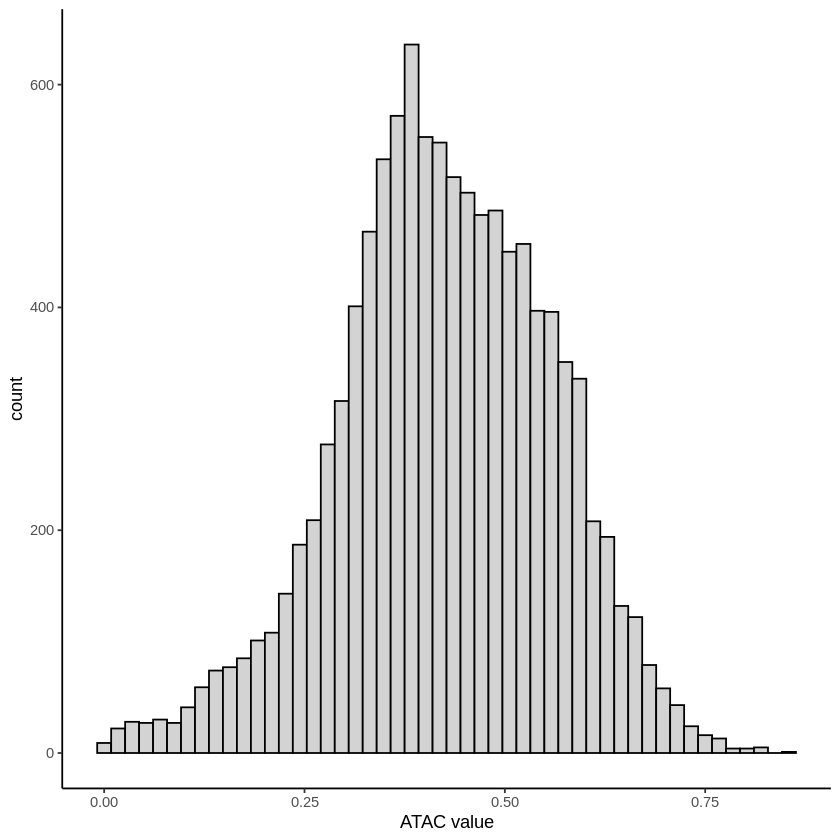

In [11]:
ggplot(data = ATAC) +
    geom_histogram(aes(x=ATAC_val), bins = 50, fill = "lightgrey", color = "black") + 
theme_classic() + xlab("ATAC value")


#### Plot the fragment length distribution in bin chr10_100

bin,bin_size,bin_count
chr10_100,X30,1
chr10_100,X31,4
chr10_100,X32,3
chr10_100,X33,0
chr10_100,X34,1
chr10_100,X35,1


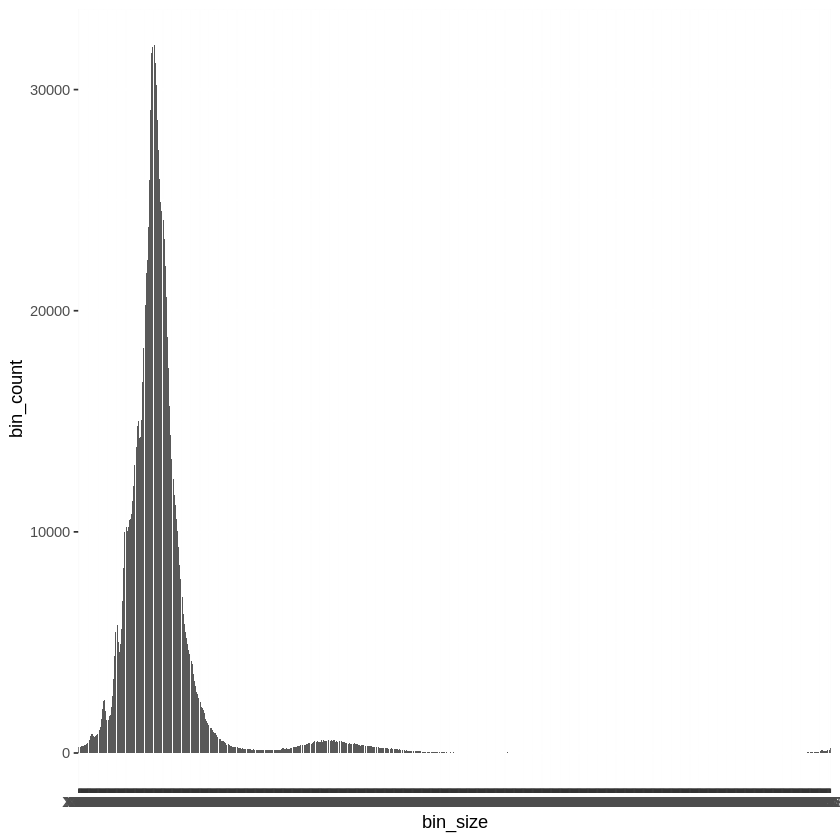

In [12]:
chr10_100 <- summed_controls %>% slice(1:1)

chr10_100_long <- chr10_100 %>% pivot_longer(!bin, names_to = "bin_size", values_to = "bin_count")
head(chr10_100_long)

ggplot(chr10_100_long) + geom_col(aes(x = bin_size, y = bin_count))

#### Normalize bins so they sum to one

In [13]:
dim(summed_controls)

[1] 10303   672

In [14]:
summed_controls_numeric <- summed_controls 
summed_controls_numeric[2:672] <- lapply(summed_controls[2:672], as.numeric)

In [15]:
head(summed_controls_numeric)

bin,X30,X31,X32,X33,X34,X35,X36,X37,X38,...,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700
chr10_100,1,4,3,0,1,1,2,2,0,...,0,0,0,0,0,0,0,0,0,0
chr10_1,1,1,0,1,2,1,1,7,4,...,0,0,0,0,0,0,0,0,0,0
chr10_10,1,2,1,1,0,0,3,4,0,...,0,0,0,0,0,0,0,0,0,1
chr10_101,0,2,0,1,1,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
chr10_102,0,1,0,0,1,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
chr10_103,0,0,0,5,2,2,1,0,3,...,0,0,0,0,0,0,0,0,0,0


In [16]:
summed_controls_normalized <- summed_controls_numeric
summed_controls_normalized[2:672] <- normalize(as.matrix(summed_controls_numeric[2:672]), byrow = TRUE, tol = 1e-1000)

In [17]:
head(summed_controls_normalized)

bin,X30,X31,X32,X33,X34,X35,X36,X37,X38,...,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700
chr10_100,8.699646e-07,3.479859e-06,2.609894e-06,0.000000e+00,8.699646e-07,8.699646e-07,1.739929e-06,1.739929e-06,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0.000000e+00
chr10_1,8.313727e-07,8.313727e-07,0.000000e+00,8.313727e-07,1.662745e-06,8.313727e-07,8.313727e-07,5.819609e-06,3.325491e-06,...,0,0,0,0,0,0,0,0,0,0.000000e+00
chr10_10,8.705774e-07,1.741155e-06,8.705774e-07,8.705774e-07,0.000000e+00,0.000000e+00,2.611732e-06,3.482309e-06,0.000000e+00,...,0,0,0,0,0,0,0,0,0,8.705774e-07
chr10_101,0.000000e+00,1.700685e-06,0.000000e+00,8.503423e-07,8.503423e-07,1.700685e-06,8.503423e-07,0.000000e+00,8.503423e-07,...,0,0,0,0,0,0,0,0,0,0.000000e+00
chr10_102,0.000000e+00,9.416577e-07,0.000000e+00,0.000000e+00,9.416577e-07,0.000000e+00,9.416577e-07,0.000000e+00,2.824973e-06,...,0,0,0,0,0,0,0,0,0,0.000000e+00
chr10_103,0.000000e+00,0.000000e+00,0.000000e+00,4.221123e-06,1.688449e-06,1.688449e-06,8.442245e-07,0.000000e+00,2.532674e-06,...,0,0,0,0,0,0,0,0,0,0.000000e+00


In [18]:
#rowSums(summed_controls_normalized[2:672])

#### Merging the data frames 

In [19]:
summed_controls_normalized$bin <- as.character(summed_controls_normalized$bin)

In [20]:
sum_control_ATAC <- inner_join(summed_controls_normalized, ATAC, by="bin")
head(sum_control_ATAC)

bin,X30,X31,X32,X33,X34,X35,X36,X37,X38,...,X692,X693,X694,X695,X696,X697,X698,X699,X700,ATAC_val
chr10_100,8.699646e-07,3.479859e-06,2.609894e-06,0.000000e+00,8.699646e-07,8.699646e-07,1.739929e-06,1.739929e-06,0.000000e+00,...,0,0,0,0,0,0,0,0,0.000000e+00,0.5931657
chr10_1,8.313727e-07,8.313727e-07,0.000000e+00,8.313727e-07,1.662745e-06,8.313727e-07,8.313727e-07,5.819609e-06,3.325491e-06,...,0,0,0,0,0,0,0,0,0.000000e+00,0.4089315
chr10_10,8.705774e-07,1.741155e-06,8.705774e-07,8.705774e-07,0.000000e+00,0.000000e+00,2.611732e-06,3.482309e-06,0.000000e+00,...,0,0,0,0,0,0,0,0,8.705774e-07,0.3058228
chr10_101,0.000000e+00,1.700685e-06,0.000000e+00,8.503423e-07,8.503423e-07,1.700685e-06,8.503423e-07,0.000000e+00,8.503423e-07,...,0,0,0,0,0,0,0,0,0.000000e+00,0.4764137
chr10_102,0.000000e+00,9.416577e-07,0.000000e+00,0.000000e+00,9.416577e-07,0.000000e+00,9.416577e-07,0.000000e+00,2.824973e-06,...,0,0,0,0,0,0,0,0,0.000000e+00,0.2862775
chr10_103,0.000000e+00,0.000000e+00,0.000000e+00,4.221123e-06,1.688449e-06,1.688449e-06,8.442245e-07,0.000000e+00,2.532674e-06,...,0,0,0,0,0,0,0,0,0.000000e+00,0.3169988


#### Check for NAs

In [21]:
sum(is.na(sum_control_ATAC))

[1] 0

In [22]:
dim(sum_control_ATAC)

[1] 10303   673

Dimensions of the raw and merged data. NA values were removed in the merging 

In [23]:
dim(ATAC)
dim(summed_controls)
dim(sum_control_ATAC)

# 11515 - 704 (NAs in ATAC raw) = 10811 ????

[1] 11515     2

[1] 10303   672

[1] 10303   673

#### Lasso regression 

In [24]:
library(glmnet)

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack

Loading required package: foreach

Attaching package: ‘foreach’

The following objects are masked from ‘package:purrr’:

    accumulate, when

Loaded glmnet 2.0-16



Finding the best lambda

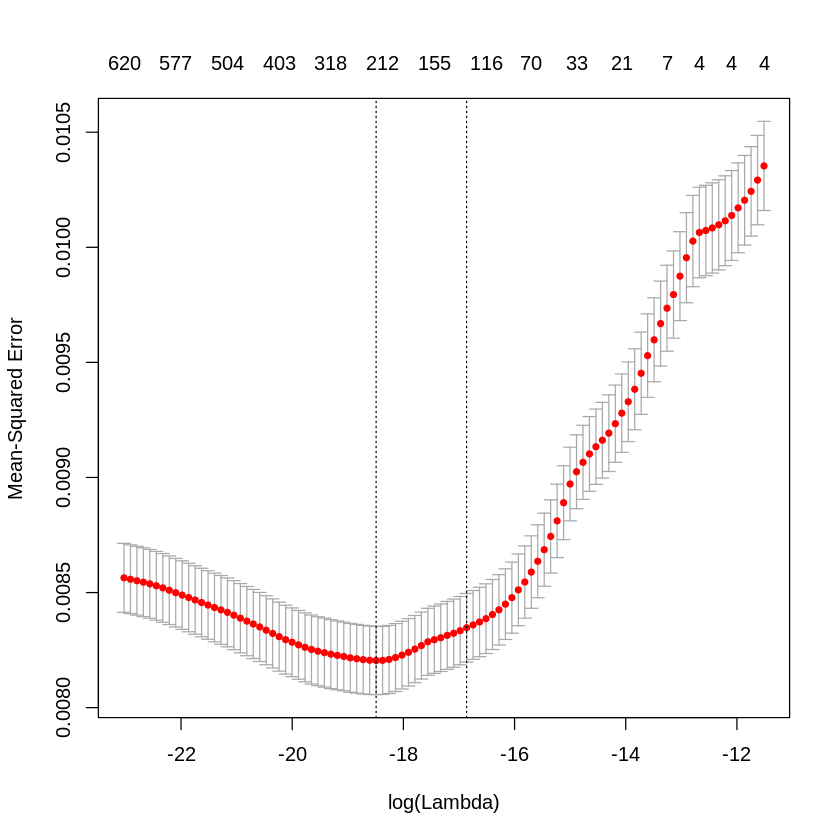

In [25]:
set.seed(0)
#X==predictor
#y==response
sum_control_ATAC_bin_rm <- sum_control_ATAC  %>% dplyr::select(-bin)

y <- sum_control_ATAC_bin_rm %>% dplyr::select(ATAC_val) %>%  as.matrix()
X <- sum_control_ATAC_bin_rm %>% dplyr::select(-ATAC_val) %>% as.matrix()

lambdas_to_try <- 10^seq(-10, -5, length.out = 100)
#standardize = FALSE -- range -10 to -5
#standardize = TRUE -- range -7 to -3


lasso_cv <- cv.glmnet(X, y, alpha = 1, lambda = lambdas_to_try,
                      standardize = FALSE, nfolds = 10)

#Plotting the MSE and log(lambda)

plot(lasso_cv)

In [26]:
(lambda_cv <- lasso_cv$lambda.min)

[1] 9.326033e-09

Cross validation to find the RSME

In [27]:
CV_lasso<-function(data, nfolds){
    set.seed(0)
    cvfolds <- cut(1:nrow(data), breaks = nfolds, labels = F)
    cvfolds <- sample(cvfolds)
    

    predicted <- rep(NA, nrow(data))
    #data_as_matrix <- data %>% dplyr::select(-ATAC_val) %>% as.matrix() 
    
    y <- data %>% dplyr::select(ATAC_val) %>%  as.matrix()
    X <- data %>% dplyr::select(-ATAC_val) %>% as.matrix() 
    
    for (i in 1:nfolds){
        rows      <- which(cvfolds==i)
        testdata  <- X[rows,]
        traindata <- X[-rows,]
        train_y <- y[-rows,]

        fit       <- glmnet(traindata, train_y, alpha = 1, lambda = lambda_cv, standardize = FALSE)
        tmp       <- predict(fit, s=lambda_cv, testdata)
        predicted[rows] <- tmp
    }
    
    rm(tmp)
    observed <- y
    head(observed)
    mean(observed)
    se    <- (observed-predicted)^2
    mse   <- mean(se)
    (rmse <- sqrt(mse))
    
    return(tibble(observed = observed, predicted = predicted))
}

In [28]:
res_lasso_pred <- CV_lasso(sum_control_ATAC_bin_rm, 10)

In [29]:
head(res_lasso_pred)

observed,predicted
0.5931657,0.5032123
0.4089315,0.3428972
0.3058228,0.3487171
0.4764137,0.4207746
0.2862775,0.3190523
0.3169988,0.3438922


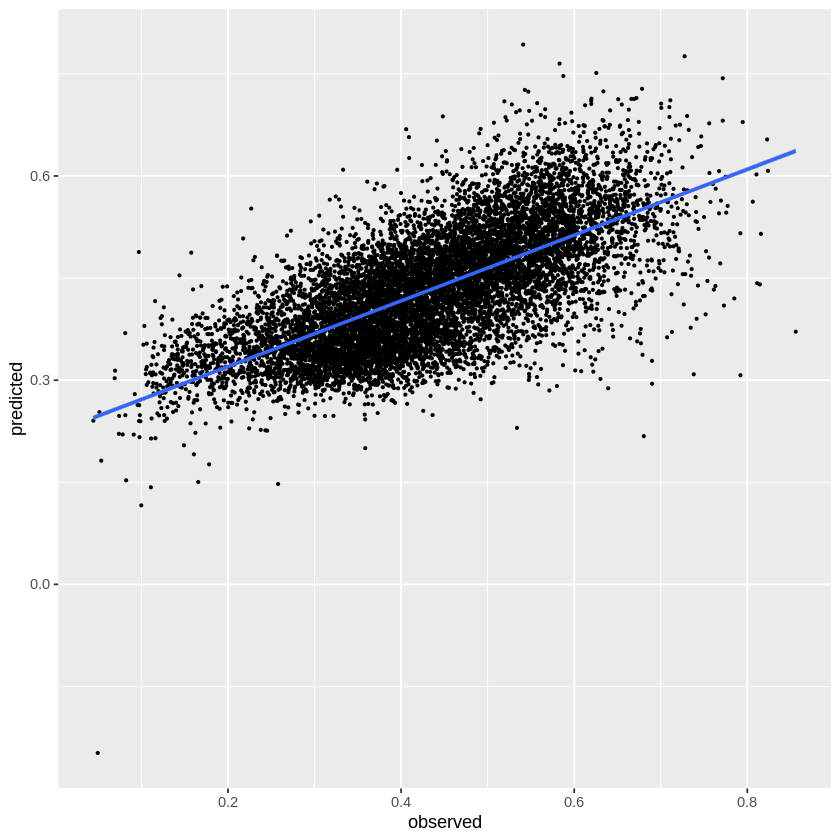

In [30]:
ggplot(res_lasso_pred, aes(x = observed, y = predicted)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method = "lm", formula = y~x)

In [31]:
cor(res_lasso_pred$observed, res_lasso_pred$predicted)

# Standardize = TRUE: ATAC_val 0.6863115
# Standardize = FALSE: ATAC_val 0.6902794

ATAC_val,0.6902794


##### Lasso predictor coefficients

In [32]:
y <- sum_control_ATAC_bin_rm %>% dplyr::select(ATAC_val) %>%  as.matrix()
X <- sum_control_ATAC_bin_rm %>% dplyr::select(-ATAC_val) %>% as.matrix()

model_cv <- glmnet(X, y, alpha = 1, lambda = lambda_cv, standardize = FALSE)

In [33]:
predictors_used<-tibble(predictors=as.vector(rownames(model_cv$beta)),coefficient=as.vector(model_cv$beta)) 
#%>% filter(coefficient!=0)

(predictors_used<- predictors_used %>%
  arrange(desc(abs(coefficient))))

predictors,coefficient
X464,-757.5848
X462,-513.2107
X461,-337.6752
X459,-283.6083
X405,-283.0443
X467,-273.5632
X480,-225.0347
X473,-210.4513
X474,-204.5429
X278,180.9774


In [34]:
sum(abs(predictors_used$coefficient) == 0)

dim(predictors_used %>% filter(coefficient == 0))

[1] 445

[1] 445   2

In [35]:
sum(abs(predictors_used$coefficient) != 0)

[1] 226

### Ridge regression

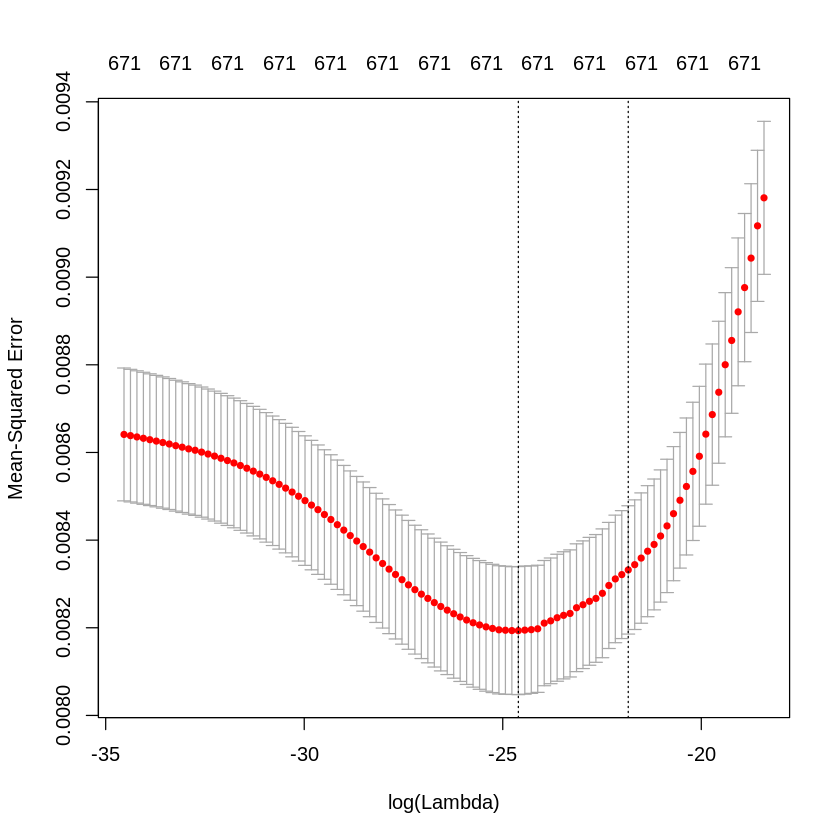

In [36]:
set.seed(0)
#X==predictor
#y==response
sum_control_ATAC_bin_rm <- sum_control_ATAC  %>% dplyr::select(-bin)

y <- sum_control_ATAC_bin_rm %>% dplyr::select(ATAC_val) %>%  as.matrix()
X <- sum_control_ATAC_bin_rm %>% dplyr::select(-ATAC_val) %>% as.matrix()

ridge_lambdas_to_try <- 10^seq(-15, -8, length.out = 100)
#-15 and -8 for not standardized
#- 10 an 0 for standardized

ridge_cv <- cv.glmnet(X, y, alpha = 0, lambda = ridge_lambdas_to_try,
                      standardize = FALSE, nfolds = 10)

#Plotting the MSE and log(lambda)

plot(ridge_cv)

In [37]:
(ridge_lambda_cv <- ridge_cv$lambda.min)

[1] 2.056512e-11

In [38]:
CV_ridge<-function(data, nfolds){
    set.seed(0)
    cvfolds <- cut(1:nrow(data), breaks = nfolds, labels = F)
    cvfolds <- sample(cvfolds)

    predicted <- rep(NA, nrow(data))
    #data_as_matrix <- data %>% dplyr::select(-ATAC_val) %>% as.matrix() 
    
    y <- data %>% dplyr::select(ATAC_val) %>%  as.matrix()
    X <- data %>% dplyr::select(-ATAC_val) %>% as.matrix() 
    
    for (i in 1:nfolds){
        rows      <- which(cvfolds==i)
        testdata  <- X[rows,]
        traindata <- X[-rows,]
        train_y <- y[-rows,]

        fit       <- glmnet(traindata, train_y, alpha = 0, lambda = ridge_lambda_cv, standardize = FALSE)
        tmp       <- predict(fit, s=ridge_lambda_cv, testdata)
        predicted[rows] <- tmp
    }
    
    rm(tmp)
    observed <- y
    head(observed)
    mean(observed)
    se    <- (observed-predicted)^2
    mse   <- mean(se)
    (rmse <- sqrt(mse))
    
    return(tibble(observed = observed, predicted = predicted))
}

In [39]:
res_ridge_pred <- CV_ridge(sum_control_ATAC_bin_rm, 10)

In [40]:
head(res_ridge_pred)

observed,predicted
0.5931657,0.5074434
0.4089315,0.3403363
0.3058228,0.3426102
0.4764137,0.4212417
0.2862775,0.3115291
0.3169988,0.3442019


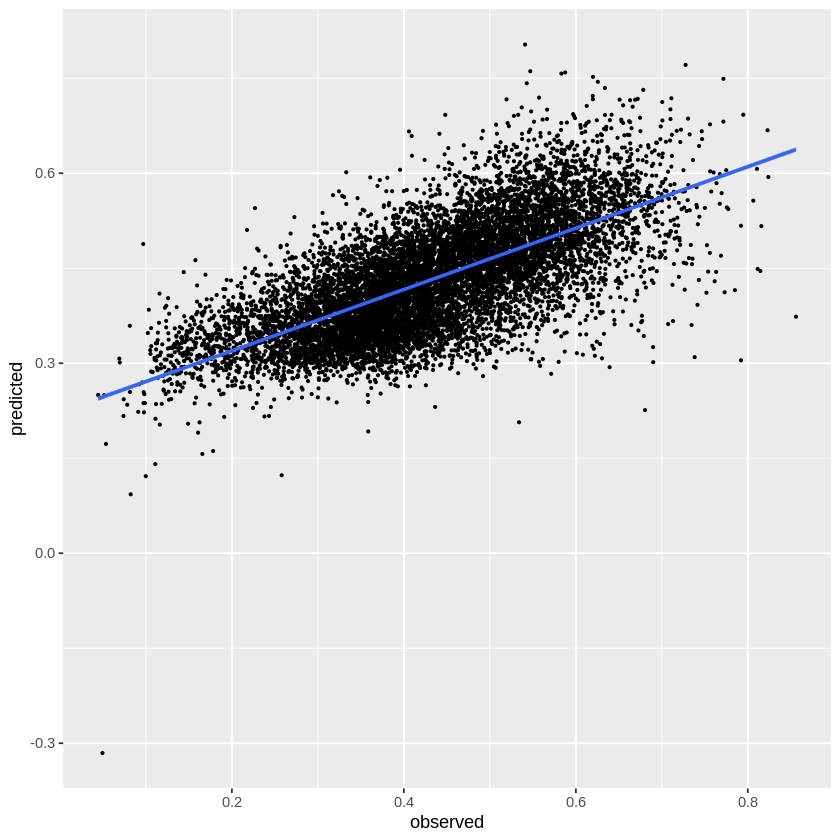

In [41]:
ggplot(res_ridge_pred, aes(x = observed, y = predicted)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method = "lm", formula = y~x)

In [42]:
cor(res_ridge_pred$observed, res_ridge_pred$predicted)
#Correlation, standardized = FALSE --> 0.6902411
#Correlation, standardized = TRUE --> 0.6785781

ATAC_val,0.6902411


Extract the predictors

In [43]:
y <- sum_control_ATAC_bin_rm %>% dplyr::select(ATAC_val) %>%  as.matrix()
X <- sum_control_ATAC_bin_rm %>% dplyr::select(-ATAC_val) %>% as.matrix()

model <- glmnet(X, y, alpha = 0, lambda = ridge_lambda_cv, standardize = FALSE)

In [53]:
colnames(sum_control_ATAC_bin_rm)

[1] "X30"      "X31"      "X32"      "X33"      "X34"      "X35"     
  [7] "X36"      "X37"      "X38"      "X39"      "X40"      "X41"     
 [13] "X42"      "X43"      "X44"      "X45"      "X46"      "X47"     
 [19] "X48"      "X49"      "X50"      "X51"      "X52"      "X53"     
 [25] "X54"      "X55"      "X56"      "X57"      "X58"      "X59"     
 [31] "X60"      "X61"      "X62"      "X63"      "X64"      "X65"     
 [37] "X66"      "X67"      "X68"      "X69"      "X70"      "X71"     
 [43] "X72"      "X73"      "X74"      "X75"      "X76"      "X77"     
 [49] "X78"      "X79"      "X80"      "X81"      "X82"      "X83"     
 [55] "X84"      "X85"      "X86"      "X87"      "X88"      "X89"     
 [61] "X90"      "X91"      "X92"      "X93"      "X94"      "X95"     
 [67] "X96"      "X97"      "X98"      "X99"      "X100"     "X101"    
 [73] "X102"     "X103"     "X104"     "X105"     "X106"     "X107"    
 [79] "X108"     "X109"     "X110"     "X111"     "X112"     "X113"    
 [85] "X114"     "X115"     "X116"     "X117"     "X118"     "X119"    
 [91] "X120"     "X121"     "X122"     "X123"     "X124"     "X125"    
 [97] "X126"     "X127"     "X128"     "X129"     "X130"     "X131"    
[103] "X132"     "X133"     "X134"     "X135"     "X136"     "X137"    
[109] "X138"     "X139"     "X140"     "X141"     "X142"     "X143"    
[115] "X144"     "X145"     "X146"     "X147"     "X148"     "X149"    
[121] "X150"     "X151"     "X152"     "X153"     "X154"     "X155"    
[127] "X156"     "X157"     "X158"     "X159"     "X160"     "X161"    
[133] "X162"     "X163"     "X164"     "X165"     "X166"     "X167"    
[139] "X168"     "X169"     "X170"     "X171"     "X172"     "X173"    
[145] "X174"     "X175"     "X176"     "X177"     "X178"     "X179"    
[151] "X180"     "X181"     "X182"     "X183"     "X184"     "X185"    
[157] "X186"     "X187"     "X188"     "X189"     "X190"     "X191"    
[163] "X192"     "X193"     "X194"     "X195"     "X196"     "X197"    
[169] "X198"     "X199"     "X200"     "X201"     "X202"     "X203"    
[175] "X204"     "X205"     "X206"     "X207"     "X208"     "X209"    
[181] "X210"     "X211"     "X212"     "X213"     "X214"     "X215"    
[187] "X216"     "X217"     "X218"     "X219"     "X220"     "X221"    
[193] "X222"     "X223"     "X224"     "X225"     "X226"     "X227"    
[199] "X228"     "X229"     "X230"     "X231"     "X232"     "X233"    
[205] "X234"     "X235"     "X236"     "X237"     "X238"     "X239"    
[211] "X240"     "X241"     "X242"     "X243"     "X244"     "X245"    
[217] "X246"     "X247"     "X248"     "X249"     "X250"     "X251"    
[223] "X252"     "X253"     "X254"     "X255"     "X256"     "X257"    
[229] "X258"     "X259"     "X260"     "X261"     "X262"     "X263"    
[235] "X264"     "X265"     "X266"     "X267"     "X268"     "X269"    
[241] "X270"     "X271"     "X272"     "X273"     "X274"     "X275"    
[247] "X276"     "X277"     "X278"     "X279"     "X280"     "X281"    
[253] "X282"     "X283"     "X284"     "X285"     "X286"     "X287"    
[259] "X288"     "X289"     "X290"     "X291"     "X292"     "X293"    
[265] "X294"     "X295"     "X296"     "X297"     "X298"     "X299"    
[271] "X300"     "X301"     "X302"     "X303"     "X304"     "X305"    
[277] "X306"     "X307"     "X308"     "X309"     "X310"     "X311"    
[283] "X312"     "X313"     "X314"     "X315"     "X316"     "X317"    
[289] "X318"     "X319"     "X320"     "X321"     "X322"     "X323"    
[295] "X324"     "X325"     "X326"     "X327"     "X328"     "X329"    
[301] "X330"     "X331"     "X332"     "X333"     "X334"     "X335"    
[307] "X336"     "X337"     "X338"     "X339"     "X340"     "X341"    
[313] "X342"     "X343"     "X344"     "X345"     "X346"     "X347"    
[319] "X348"     "X349"     "X350"     "X351"     "X352"     "X353"    
[325] "X354"     "X355"     "X356"     "X357"     "X358"     "X359"    
[331] "X360"     "X361"     "X362"     "X3

In [44]:
predictors_used<-tibble(predictors=as.vector(rownames(model$beta)),coefficient=as.vector(model$beta)) %>% filter(coefficient!=0)

(predictors_used<- predictors_used %>%
  arrange(desc(abs(coefficient))))

predictors,coefficient
X227,130.45692
X322,127.86739
X313,126.43525
X319,121.46726
X312,116.01586
X125,114.31221
X129,107.92915
X99,-107.59225
X323,106.42202
X130,102.94495


In [45]:
sum(abs(predictors_used$coefficient) < 0.5)

[1] 27

#### Smooth the values with a sliding average, and try lasso again

In [46]:
sum_control_ATAC_bin_rm_sliding_mean <- matrix(ncol = 672, nrow = 0)

for (row in 1:nrow(sum_control_ATAC_bin_rm)){
    row_cur <- sum_control_ATAC_bin_rm[row, ]
    row_cur <- as.vector(t(row_cur))
    roll_m <- slide_dbl(row_cur, mean, .before = 5, .after = 5)
    sum_control_ATAC_bin_rm_sliding_mean <- rbind(sum_control_ATAC_bin_rm_sliding_mean, roll_m)
}
sum_control_ATAC_bin_rm_sliding_mean <- as.data.frame(sum_control_ATAC_bin_rm_sliding_mean, index = FALSE)
colnames(sum_control_ATAC_bin_rm_sliding_mean) <- colnames(sum_control_ATAC_bin_rm)
rownames(sum_control_ATAC_bin_rm_sliding_mean) <- NULL

In [47]:
head(sum_control_ATAC_bin_rm_sliding_mean)

X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X692,X693,X694,X695,X696,X697,X698,X699,X700,ATAC_val
1.449941e-06,1.491368e-06,1.522438e-06,1.353278e-06,1.478940e-06,1.423579e-06,1.581754e-06,1.581754e-06,1.502666e-06,1.581754e-06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.05392415,0.05931657,0.06590730,0.07414571,0.08473796,0.09886095
8.313727e-07,8.313727e-07,1.454902e-06,1.662745e-06,1.829020e-06,2.040642e-06,2.116221e-06,2.342959e-06,2.494118e-06,2.645277e-06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.03717559,0.04089315,0.04543683,0.05111644,0.05841879,0.06815525
7.254811e-07,9.949456e-07,1.305866e-06,1.160770e-06,1.131751e-06,1.028864e-06,1.028864e-06,9.497208e-07,1.108008e-06,1.108008e-06,...,0.000000e+00,0.000000e+00,0.000000e+00,7.914340e-08,0.02780215,0.03058237,0.03398041,0.03822796,0.04368910,0.05097062
8.503423e-07,8.503423e-07,7.440495e-07,7.558598e-07,7.653081e-07,7.730385e-07,8.503423e-07,8.503423e-07,9.276462e-07,8.503423e-07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.04331034,0.04764137,0.05293486,0.05955172,0.06805910,0.07940229
3.138859e-07,4.035676e-07,3.531216e-07,6.277718e-07,5.649946e-07,7.704472e-07,8.560525e-07,1.198473e-06,1.369684e-06,1.455289e-06,...,8.560525e-08,8.560525e-08,8.560525e-08,8.560525e-08,0.02602523,0.02862775,0.03180861,0.03578468,0.04089678,0.04771291
1.266337e-06,1.206035e-06,1.055281e-06,1.219435e-06,1.097492e-06,1.151215e-06,1.151215e-06,1.151215e-06,1.227963e-06,9.977199e-07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.02881807,0.03169988,0.03522209,0.03962485,0.04528554,0.05283313


In [48]:
dim(sum_control_ATAC_bin_rm_sliding_mean)

[1] 10303   672

In [51]:
chr10_100 <- sum_control_ATAC_bin_rm_sliding_mean %>% slice(1:1)

chr10_100_long <- chr10_100 %>% pivot_longer(names_to = "bin_size", values_to = "bin_count")
head(chr10_100_long)

ggplot(chr10_100_long) + geom_col(aes(x = bin_size, y = bin_count))

ERROR: Error: `cols` must select at least one column.


Lasso regression (after smoothing)

In [1]:
set.seed(0)
#X==predictor
#y==response
#sum_control_ATAC_bin_rm <- sum_control_ATAC  %>% dplyr::select(-bin)



y <- sum_control_ATAC_bin_rm %>% dplyr::select(ATAC_val) %>%  as.matrix()
X <- sum_control_ATAC_bin_rm_sliding_mean dplyr::select(-ATAC_Val)%>% as.matrix()
head(X)


#lambdas_to_try <- 10^seq(-20, -10, length.out = 100)
#standardize = FALSE -- range 
#standardize = TRUE -- range 


#lasso_smooth_cv <- cv.glmnet(X, y, alpha = 1, lambda = lambdas_to_try,
                      standardize = FALSE, nfolds = 10)

#Plotting the MSE and log(lambda)

#plot(lasso_smooth_cv)

ERROR: Error in parse(text = x, srcfile = src): <text>:9:43: unexpected symbol
8: y <- sum_control_ATAC_bin_rm %>% dplyr::select(ATAC_val) %>%  as.matrix()
9: X <- sum_control_ATAC_bin_rm_sliding_mean dplyr
                                             ^


In [89]:
(lambda_smooth_cv <- lasso_smooth_cv$lambda.min)

[1] 1e-20

In [90]:
CV_lasso_smooth<-function(data, nfolds){
    set.seed(0)
    cvfolds <- cut(1:nrow(data), breaks = nfolds, labels = F)
    cvfolds <- sample(cvfolds)
    

    predicted <- rep(NA, nrow(data))
    #data_as_matrix <- data %>% dplyr::select(-ATAC_val) %>% as.matrix() 
    
    y <- sum_control_ATAC_bin_rm %>% dplyr::select(ATAC_val) %>%  as.matrix()
    X <- sum_control_ATAC_bin_rm_sliding_mean %>% as.matrix()
    
    for (i in 1:nfolds){
        rows      <- which(cvfolds==i)
        testdata  <- X[rows,]
        traindata <- X[-rows,]
        train_y <- y[-rows,]

        fit       <- glmnet(traindata, train_y, alpha = 1, lambda = lambda_smooth_cv, standardize = FALSE)
        tmp       <- predict(fit, s=lambda_cv, testdata)
        predicted[rows] <- tmp
    }
    
    rm(tmp)
    observed <- y
    head(observed)
    mean(observed)
    se    <- (observed-predicted)^2
    mse   <- mean(se)
    (rmse <- sqrt(mse))
    
    return(tibble(observed = observed, predicted = predicted))
}

In [91]:
res_lasso_smooth_pred <- CV_lasso_smooth(sum_control_ATAC_bin_rm, 10)

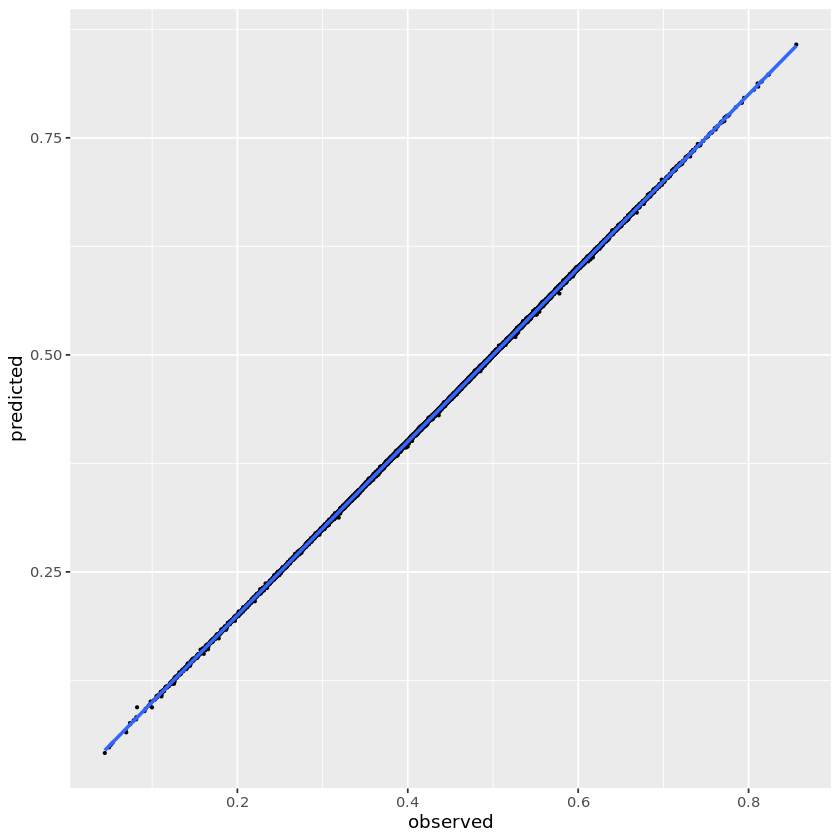

In [92]:
ggplot(res_lasso_smooth_pred, aes(x = observed, y = predicted)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method = "lm", formula = y~x)

In [94]:
cor(res_lasso_smooth_pred$observed, res_lasso_smooth_pred$predicted)

# Standardize = TRUE: ATAC_val 0.9999885
# Standardize = FALSE: ATAC_val 0.9999655

ATAC_val,0.9999655


Ridge regression (after smoothing)

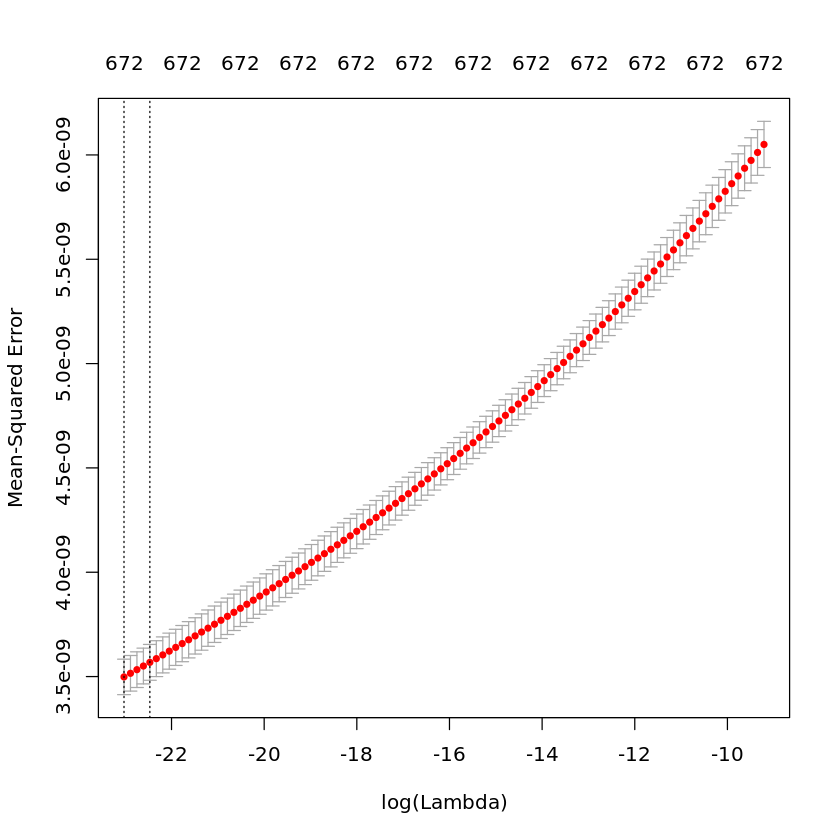

In [102]:
set.seed(0)
#X==predictor
#y==response
#sum_control_ATAC_bin_rm <- sum_control_ATAC  %>% dplyr::select(-bin)



y <- sum_control_ATAC_bin_rm %>% dplyr::select(ATAC_val) %>%  as.matrix()
X <- sum_control_ATAC_bin_rm_sliding_mean %>% as.matrix()

lambdas_to_try <- 10^seq(-10, -4, length.out = 100)
#standardize = FALSE -- range 
#standardize = TRUE -- range 


ridge_cv_smooth <- cv.glmnet(X, y, alpha = 0, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 10)

#Plotting the MSE and log(lambda)

plot(ridge_cv_smooth)

In [103]:
(lambda_cv_ridge_smooth <- ridge_cv_smooth$lambda.min)

[1] 1e-10

In [104]:
CV_ridge_smooth<-function(data, nfolds){
    set.seed(0)
    cvfolds <- cut(1:nrow(data), breaks = nfolds, labels = F)
    cvfolds <- sample(cvfolds)
    

    predicted <- rep(NA, nrow(data))
    #data_as_matrix <- data %>% dplyr::select(-ATAC_val) %>% as.matrix() 
    
    y <- sum_control_ATAC_bin_rm %>% dplyr::select(ATAC_val) %>%  as.matrix()
    X <- sum_control_ATAC_bin_rm_sliding_mean %>% as.matrix()
    
    for (i in 1:nfolds){
        rows      <- which(cvfolds==i)
        testdata  <- X[rows,]
        traindata <- X[-rows,]
        train_y <- y[-rows,]

        fit       <- glmnet(traindata, train_y, alpha = 0, lambda = lambda_cv_ridge_smooth, standardize = TRUE)
        tmp       <- predict(fit, s=lambda_cv, testdata)
        predicted[rows] <- tmp
    }
    
    rm(tmp)
    observed <- y
    head(observed)
    mean(observed)
    se    <- (observed-predicted)^2
    mse   <- mean(se)
    (rmse <- sqrt(mse))
    
    return(tibble(observed = observed, predicted = predicted))
}

In [105]:
res_ridge_smooth_pred <- CV_ridge_smooth(sum_control_ATAC_bin_rm, 10)

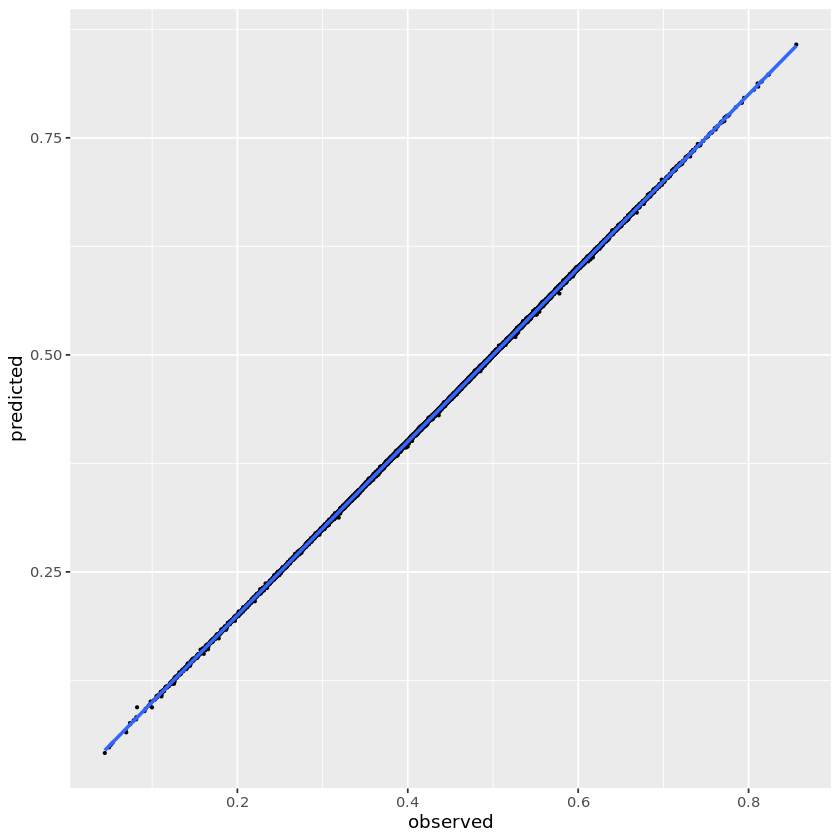

In [106]:
ggplot(res_ridge_smooth_pred, aes(x = observed, y = predicted)) + 
    geom_point(size = 0.5) + 
    geom_smooth(method = "lm", formula = y~x)

In [108]:
cor(res_ridge_smooth_pred$observed, res_ridge_smooth_pred$predicted)

# Standardize = TRUE: ATAC_val 0.9999655
# Standardize = FALSE: ATAC_val 0.9999941


ATAC_val,0.9999655
